# Description

It uses the `clustree` package to generate clustering tree visualizations.

# Modules loading

In [1]:
library(clustree)
library(tidyverse)

Loading required package: ggraph



Loading required package: ggplot2



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──



✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Settings

In [2]:
CLUSTERING_DIR <- Sys.getenv("PHENOPLIER_RESULTS_CLUSTERING_DIR")

In [3]:
CLUSTERING_DIR

[1] "/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering"

In [4]:
CONSENSUS_CLUSTERING_DIR = file.path(CLUSTERING_DIR, "consensus_clustering")

In [5]:
CONSENSUS_CLUSTERING_DIR

[1] "/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering"

In [6]:
MANUSCRIPT_FIGURES_DIR <- Sys.getenv("PHENOPLIER_MANUSCRIPT_FIGURES_DIR")

In [7]:
if (MANUSCRIPT_FIGURES_DIR == "") {
    MANUSCRIPT_FIGURES_DIR = "/tmp"
}

In [8]:
MANUSCRIPT_FIGURES_DIR

[1] "/tmp"

In [9]:
OUTPUT_FIG_DIR = file.path(MANUSCRIPT_FIGURES_DIR, "clustering")
dir.create(OUTPUT_FIG_DIR, showWarnings = FALSE)

In [10]:
OUTPUT_FIG_DIR

[1] "/tmp/clustering"

# Load data

In [11]:
data <- read_tsv(file.path(CONSENSUS_CLUSTERING_DIR, "clustering_tree_data.tsv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  trait = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [12]:
dim(data)

[1] 3752   26

In [13]:
head(data)

trait,PCA1,PCA2,PCA3,PCA4,PCA5,UMAP1,UMAP2,UMAP3,UMAP4,⋯,k11,k9,k18,k17,k16,k21,k20,k19,k13,k5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100001_raw-Food_weight,0.80521563,-0.865389766,0.6994802,-0.06597626,0.9996165,0.4265545,0.6705319,7.363805,1.1718369,⋯,0,0,0,1,1,0,0,0,12,0
100002_raw-Energy,0.58850738,-1.491772157,1.7563401,-3.59329473,2.1006066,-1.6051790,0.8156988,8.288521,0.9903937,⋯,0,0,0,1,1,18,17,17,12,0
100003_raw-Protein,1.91015954,-1.873687235,1.8766772,-3.83255651,1.2407043,-1.6561775,0.7882972,8.355906,1.0170716,⋯,0,0,0,1,1,18,17,17,12,0
100004_raw-Fat,0.75079911,-0.294732888,1.3177099,-1.34608112,2.0064032,-1.5083255,0.8025361,8.328274,1.0339391,⋯,0,0,0,1,1,18,17,17,12,0
100005_raw-Carbohydrate,-0.53004448,-0.007398246,0.6114183,-3.60409358,2.2278719,-1.6178721,0.8127108,8.307973,1.0205753,⋯,0,0,0,1,1,18,17,17,12,0
100006_raw-Saturated_fat,0.06631347,-0.351939999,1.1056447,-2.46327220,1.0044179,-1.5298475,0.8014859,8.330169,1.0320061,⋯,0,0,0,1,1,18,17,17,12,0


# Plot clustering tree

## Plain

Warning message:
“The `add` argument of `group_by()` is deprecated as of dplyr 1.0.0.
Please use the `.add` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


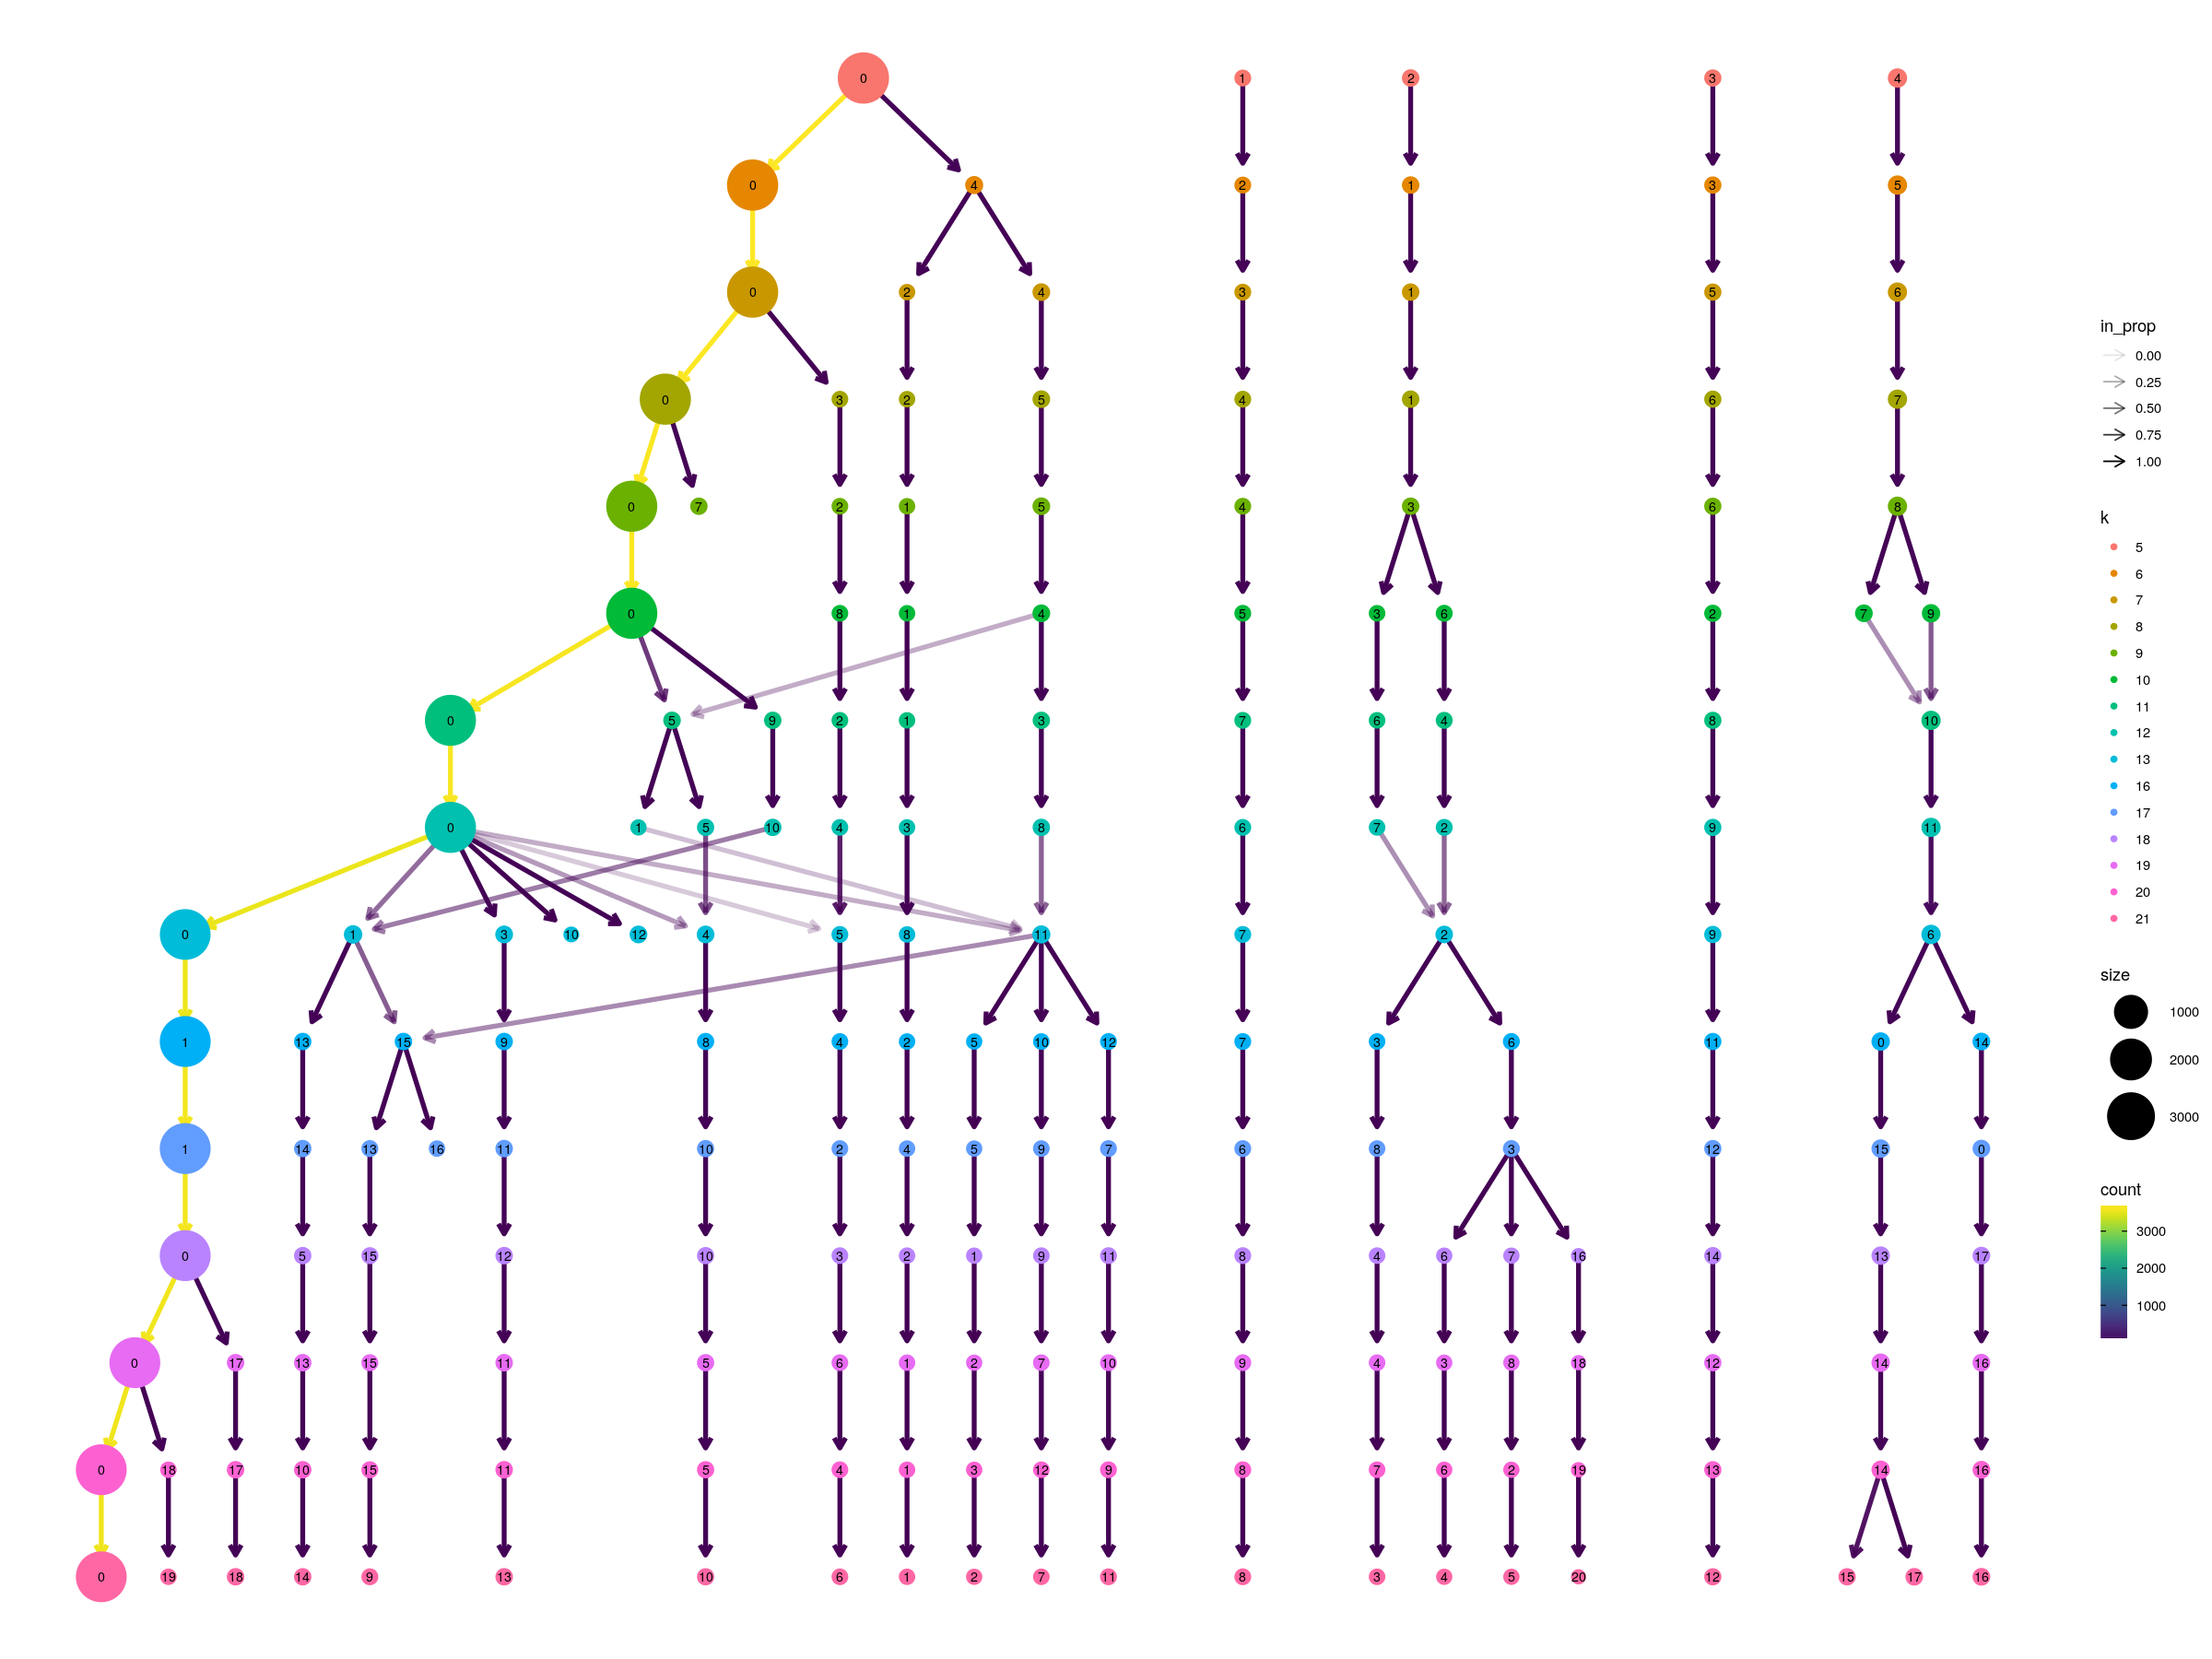

In [14]:
options(repr.plot.width = 20, repr.plot.height = 15)
clustree(data, prefix = "k")

ggsave(
    file.path(OUTPUT_FIG_DIR, "clustering_tree.pdf"),
    height=15,
    width=20,
    scale=1,
)